### Load Libraries: 

In [51]:
from models.inception_resnet_v1 import InceptionResnetV1

import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.nn as nn

import torchvision.utils as vutils
from io import open
import os
from PIL import Image
import sys

import torchvision.models as models
import pickle

import pandas as pd

import numpy as np

import sklearn.metrics

import matplotlib.pyplot as plt

### Choose version of Facenet: 

In [55]:
############  CHOOSE HERE WHICH ALGORITHM YOU WANT: #################
                                                                    #
model = InceptionResnetV1(pretrained='vggface2')                    #
SaveAs = 'VggFace2'                                                 #
                    ##################                              #
                                                                    #
# model = InceptionResnetV1(pretrained='casia-webface')               #
# SaveAs = 'CasiaWebFace'                                             #
#####################################################################

scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])


to_tensor = transforms.ToTensor()

model.eval()

C:\Users\Public\Anaconda3\envs\Keras\lib\site-packages\torchvision\transforms\transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

### Get List of images:

### Get Euclidean Distance of penultimal Layers between pairs of faces:

In [56]:

def RunModel(img_url_1,img_url_2):
    
    #First Image
    imagepath = img_url_1
    image = Image.open(imagepath)
    imgblob = Variable(normalize(to_tensor(image)).unsqueeze(0))
    
    output1 = model(imgblob)

    
    #Second Image
    imagepath = img_url_2
    image = Image.open(imagepath)
    imgblob = Variable(normalize(to_tensor(image)).unsqueeze(0))
    
    output2 = model(imgblob)


    dist = np.linalg.norm(output1.detach().numpy()-output2.detach().numpy())
#     print(dist)
    
    return(dist)

### Run: 

In [57]:
list_dir = os.listdir('C:/Users/Public/Documents/PNAS2018Images/SeparatedImages/')

In [58]:
list_dir = list_dir[1:]

In [59]:
list_dir

['D1_a.png',
 'D1_b.png',
 'D2_a.png',
 'D2_b.png',
 'D3_a.png',
 'D3_b.png',
 'D4_a.png',
 'D4_b.png',
 'D5_a.png',
 'D5_b.png',
 'D6_a.png',
 'D6_b.png',
 'D7_a.png',
 'D7_b.png',
 'D8_a.png',
 'D8_b.png',
 'S10_a.png',
 'S10_b.png',
 'S11_a.png',
 'S11_b.png',
 'S12_a.png',
 'S12_b.png',
 'S1_a.png',
 'S1_b.png',
 'S2_a.png',
 'S2_b.png',
 'S3_a.png',
 'S3_b.png',
 'S4_a.png',
 'S4_b.png',
 'S5_a.png',
 'S5_b.png',
 'S6_a.png',
 'S6_b.png',
 'S7_a.png',
 'S7_b.png',
 'S8_a.png',
 'S8_b.png',
 'S9_a.png',
 'S9_b.png']

In [60]:
i

0

In [61]:
model_result=[]
for i in range(0,40,2):
    try:
        model_result.append(RunModel('C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i],'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i+1]))
    except:
        print(list_dir[i])
        print(list_dir[i+1])

S8_a.png
S8_b.png


In [62]:
# Show the scores
for i in range(len(model_result)):
    print(model_result[i])

0.9680837
0.80767304
1.096027
1.1317283
1.0466548
0.87244165
0.98644036
1.1421632
0.89832073
0.8809692
0.5665306
1.0012897
0.78667563
0.73870915
1.0610931
0.8979379
1.1501598
1.0308855
0.8668433


In [63]:
ground_truth = []

for i in range(8):
    ground_truth.append('different') 

for i in range(11):
    ground_truth.append('same')
    


In [64]:
fpr,tpr,thresholds = sklearn.metrics.roc_curve(ground_truth,np.array(model_result),pos_label='different')

In [65]:
fpr,tpr,thresholds

(array([0.        , 0.09090909, 0.09090909, 0.18181818, 0.18181818,
        0.36363636, 0.36363636, 0.63636364, 0.63636364, 0.72727273,
        0.72727273, 1.        ]),
 array([0.   , 0.   , 0.375, 0.375, 0.5  , 0.5  , 0.75 , 0.75 , 0.875,
        0.875, 1.   , 1.   ]),
 array([2.1501598 , 1.1501598 , 1.096027  , 1.0610931 , 1.0466548 ,
        1.0012897 , 0.9680837 , 0.8809692 , 0.87244165, 0.8668433 ,
        0.80767304, 0.5665306 ], dtype=float32))

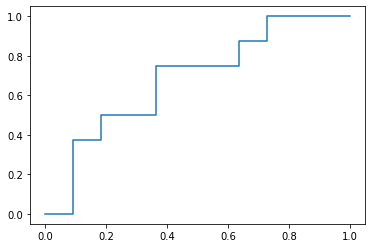

In [66]:
plt.plot(fpr,tpr)

In [67]:
sklearn.metrics.auc(fpr,tpr)

0.6818181818181818